This project was done for the subject of Energy and sustainability for the second period of 2024/2025. In the computational part, António Ferreira Nº 103506 contributed to the code and is also on Advanced Automation in group 21.0

This is the data analysis part of a project done at the same time as the course Advanced-Automation where some of the study subjects were applied.
Firstly we need to combine the data files in one more readable data file. With a simple script, this was easily done.

In [25]:
#add the file_path here
file = r"C:\Users\X521\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\tecnico\Master\ESust\Projeto\combined_chronological_data.xlsx"

In [26]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
"""
# Function to process a single file and extract relevant columns
def process_file(file_path):
    # Read the Excel file starting from line 13
    data = pd.read_excel(file_path, skiprows=12)

    # Ensure the column names are correct
    data.columns = [
        'Data', 'Hora', 'Potência Ativa Saldo (kW) - Consumo',
        'Potência Reativa Indutiva (kVAr) - Consumo',
        'Potência Reativa Capacitiva (kVAr) - Consumo',
        'Potência Ativa Saldo (kW) - Injeção',
        'Potência Reativa Indutiva (kVAr) - Injeção',
        'Potência Reativa Capacitiva (kVAr) - Injeção'
    ]

    # Convert 'Data' column to datetime and 'Hora' column to time format
    data['Data'] = pd.to_datetime(data['Data'], format='%Y/%m/%d').dt.date
    data['Hora'] = pd.to_datetime(data['Hora'], format='%H:%M').dt.time

    return data

# Folder containing Excel files
folder_path = "Data"  # Replace with your folder path
files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Process and combine data from all files
combined_data = pd.concat(
    [process_file(os.path.join(folder_path, file)) for file in sorted(files)],
    ignore_index=True
)

# Remove duplicate rows
combined_data = combined_data.drop_duplicates()

# Sort by Date and Time columns for chronological order
combined_data = combined_data.sort_values(by=['Data', 'Hora']).reset_index(drop=True)

# Save the combined data to an Excel file
output_file = "combined_chronological_data.xlsx"
combined_data.to_excel(output_file, index=False)

print(f"Combined data saved to {output_file}")
"""

'\n# Function to process a single file and extract relevant columns\ndef process_file(file_path):\n    # Read the Excel file starting from line 13\n    data = pd.read_excel(file_path, skiprows=12)\n\n    # Ensure the column names are correct\n    data.columns = [\n        \'Data\', \'Hora\', \'Potência Ativa Saldo (kW) - Consumo\',\n        \'Potência Reativa Indutiva (kVAr) - Consumo\',\n        \'Potência Reativa Capacitiva (kVAr) - Consumo\',\n        \'Potência Ativa Saldo (kW) - Injeção\',\n        \'Potência Reativa Indutiva (kVAr) - Injeção\',\n        \'Potência Reativa Capacitiva (kVAr) - Injeção\'\n    ]\n\n    # Convert \'Data\' column to datetime and \'Hora\' column to time format\n    data[\'Data\'] = pd.to_datetime(data[\'Data\'], format=\'%Y/%m/%d\').dt.date\n    data[\'Hora\'] = pd.to_datetime(data[\'Hora\'], format=\'%H:%M\').dt.time\n\n    return data\n\n# Folder containing Excel files\nfolder_path = "Data"  # Replace with your folder path\nfiles = [f for f in os.list

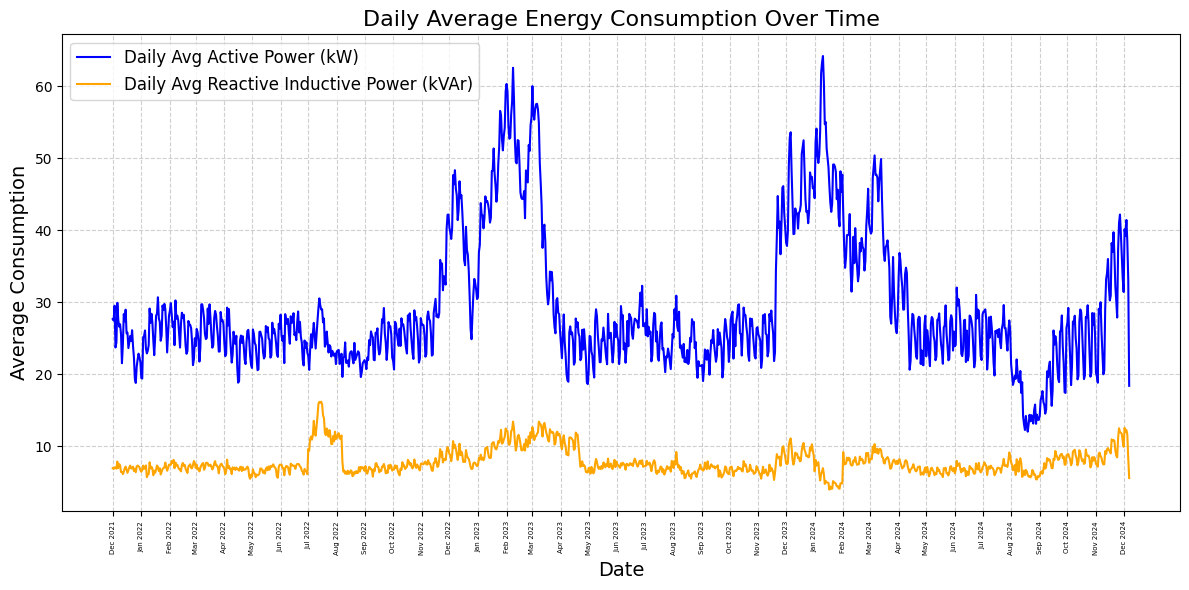

In [27]:
# Load the data
data = pd.read_excel(file)

# Ensure the 'Data' column is in datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Generate monthly ticks (start of each month)
monthly_ticks = pd.date_range(start=data['Data'].min(), end=data['Data'].max(), freq='MS')

# Calculate the daily averages for both columns
daily_average = data.groupby('Data').agg({
    'Potência Ativa Saldo (kW) - Consumo': 'mean',
    'Potência Reativa Indutiva (kVAr) - Consumo': 'mean'
}).reset_index()

# Create a complete date range to account for missing dates
full_date_range = pd.date_range(start=daily_average['Data'].min(), end=daily_average['Data'].max())

# Reindex to include all dates
daily_average = daily_average.set_index('Data').reindex(full_date_range).reset_index()

# Rename the reindexed column for clarity
daily_average.rename(columns={'index': 'Data'}, inplace=True)


daily_average['Potência Ativa Saldo (kW) - Consumo'] = daily_average['Potência Ativa Saldo (kW) - Consumo'].fillna(0)
daily_average['Potência Reativa Indutiva (kVAr) - Consumo'] = daily_average['Potência Reativa Indutiva (kVAr) - Consumo'].fillna(0)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot daily active power consumption
plt.plot(
    daily_average['Data'],
    daily_average['Potência Ativa Saldo (kW) - Consumo'],
    label="Daily Avg Active Power (kW)",
    color="blue"
)

# Plot daily reactive inductive power consumption
plt.plot(
    daily_average['Data'],
    daily_average['Potência Reativa Indutiva (kVAr) - Consumo'],
    label="Daily Avg Reactive Inductive Power (kVAr)",
    color="orange"
)

# Customize the graph
plt.title("Daily Average Energy Consumption Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Consumption", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Customize x-axis
plt.xticks(monthly_ticks, [date.strftime('%b %Y') for date in monthly_ticks], rotation=90, fontsize=5)
plt.tight_layout()

# Show the plot
plt.show()

This graph helps us visualise the data. The objective of this project is to predict the consumption in a student's residence for summer and winter optimise processes like heating and laundry, improve energy efficiency and ultimately save money.

We can see in the graph that there are very high daily averages during months when there is heating, as well as some outliers like August and Christmas time as this is when students go home for vacation. Furthermore, after September 2024 we see some different behaviour because of the installation of solar panels. January of 2022 there was no electric heating spending.
The inductive power data was not used because it had no significant impact on the consumption because of a condenser battery.

Season
Lseason    24.061012
Winter     41.624450
summer     25.322702
Name: Potência Ativa Saldo (kW) - Consumo, dtype: float64


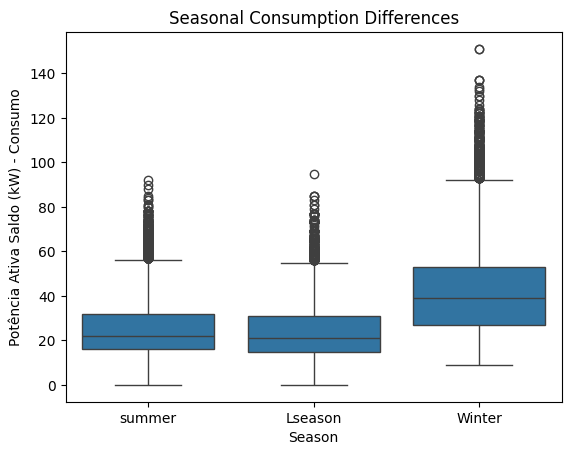

RandomForestRegressor(random_state=42)

In [28]:
def get_season(date):
    month = date.month
    year = date.year
    if month in [1, 2, 3] and year in [2023, 2024]:  # Winter
        return 'Winter'
    elif month in [11, 12] and year in [2022, 2023]:  # Winter
        return 'Winter'
    elif month in [7, 8]:  #low season
        return 'Lseason'
    elif month in [7, 8, 9, 10, 11, 12] and year in [2024]:  #low season
        return 'Lseason'
    else:
        return 'summer'

data['Season'] = data['Data'].apply(get_season)

seasonal_means = data.groupby('Season')['Potência Ativa Saldo (kW) - Consumo'].mean()
print(seasonal_means)

sns.boxplot(x='Season', y='Potência Ativa Saldo (kW) - Consumo', data=data)
plt.title('Seasonal Consumption Differences')
plt.show()


#  Convert 'Data' to string and combine with 'Hora' to create a proper datetime column
data['Datetime'] = pd.to_datetime(data['Data'].astype(str) + ' ' + data['Hora'])

#  Extract 'Hour' and 'Month' from the 'Datetime' column
data['Hour'] = data['Datetime'].dt.hour    # Extract hour from Datetime
data['day'] = data['Datetime'].dt.day_of_week # Extract month from Datetime

#  Filter for summer data (if you have a 'Season' column indicating summer)
summer_data = data[data['Season'] == 'summer']

#  Define Features (X) and Target (y)
X_summer = summer_data[['Hour', 'day']]  # features (hour, month)
y_summer = summer_data['Potência Ativa Saldo (kW) - Consumo']  # Target: Consumption

# Train the model (RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_summer, y_summer)

We decided to try to see more clearly the difference in the seasons that were used. The variables don't correspond to the real season so it is important to know what month should go to each season. We see that we did a good job separating summer and winter and although the summer average is close to the low season date we decided to not consider it because of the different hourly dynamics of vacation vs working days.

After analysing the file and also more abstract data given by the residence administration such as service schedules we decided to implement a Random Forest Resgressor.
This decision was made based on some characteristics of the data. In the first place, we know that the more significant consumers have an hourly consumption as well as a weekly one. Because of that, we wanted to use the hour as well as the day of the week to make a model valid for all "summer" months. This model easily accommodates these variables. Also, we know that with this data there is big variability, especially in the "winter" and the random forest regressor is a great model to deal with this type of data. Finally, we expect that the model can't be linear because of some big consumers that use inductive power and also thermal systems that have high thermal inertia. Although the average has a good result considering its simplicity it fails to represent some of the more complex dynamics of the system. 


C:\Users\X521\AppData\Local\Temp\ipykernel_6356\3447075111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['Datetime'] = pd.to_datetime(summer_data['Data'].astype(str) + ' ' + summer_data['Hora'])
C:\Users\X521\AppData\Local\Temp\ipykernel_6356\3447075111.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['Time'] = summer_data['Datetime'].dt.strftime('%H:%M')
C:\Users\X521\AppData\Local\Temp\ipykernel_6356\3447075111.py:11: SettingWithCopyWarning: 
A value is trying to be set on

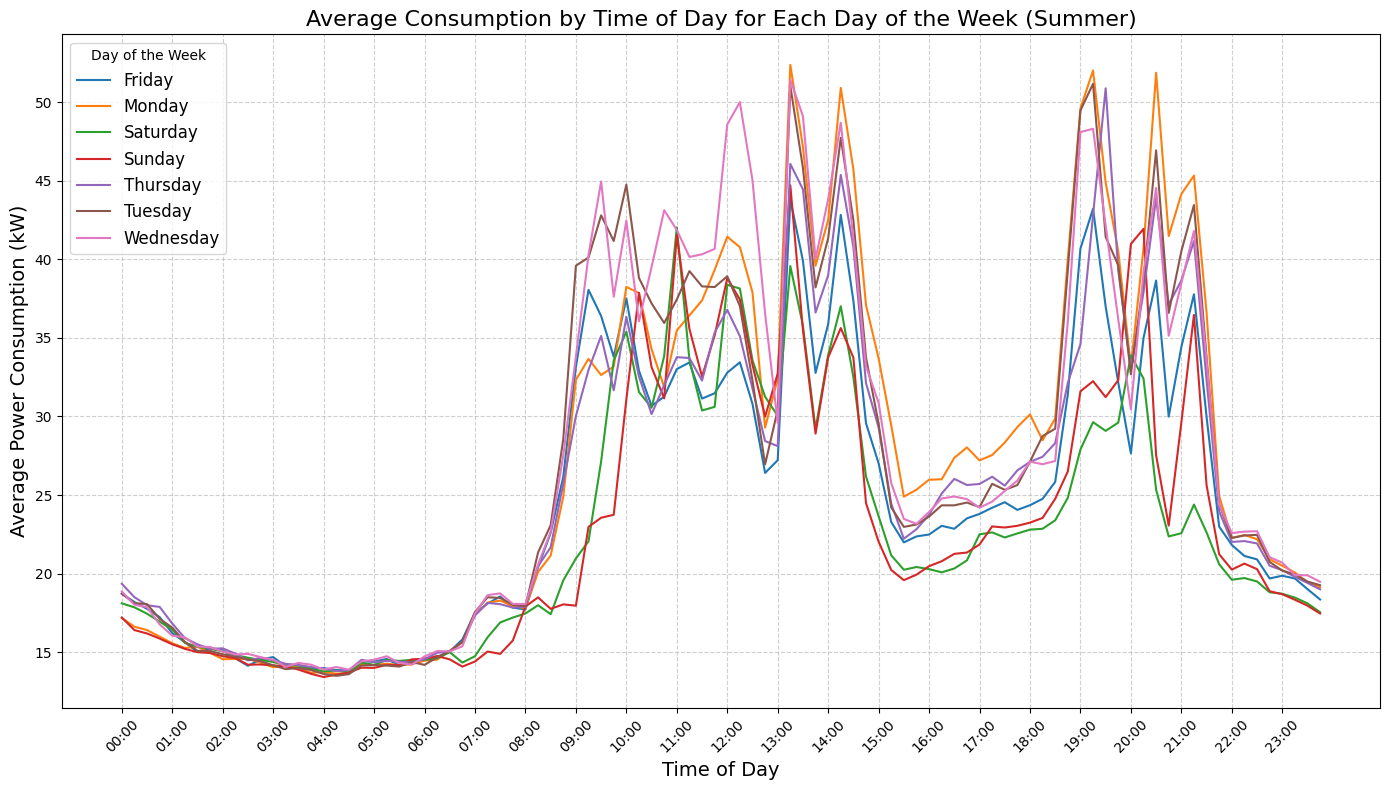

In [29]:
# 1. Filter data for summer months (June, July, August)
summer_data = data[data['Season'] == 'summer']  # Assuming you already have the 'Season' column for summer

# 2. Ensure 'Datetime' is in datetime format and extract time from 'Hora'
summer_data['Datetime'] = pd.to_datetime(summer_data['Data'].astype(str) + ' ' + summer_data['Hora'])

# 3. Extract just the time (without date) from the 'Datetime' column
summer_data['Time'] = summer_data['Datetime'].dt.strftime('%H:%M')

# 4. Extract the day of the week (e.g., Monday, Tuesday)
summer_data['DayOfWeek'] = summer_data['Datetime'].dt.day_name()

# 5. Group by time and day of the week, then calculate the average consumption
average_by_time_and_day = summer_data.groupby(['DayOfWeek', 'Time'])['Potência Ativa Saldo (kW) - Consumo'].mean().unstack(level=0)

# 6. Plot the results
plt.figure(figsize=(14, 8))
for day in average_by_time_and_day.columns:
    plt.plot(
        average_by_time_and_day.index,  # Time of day
        average_by_time_and_day[day],  # Average consumption for that day
        label=day
    )

# Customize the plot
plt.title('Average Consumption by Time of Day for Each Day of the Week (Summer)', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Average Power Consumption (kW)', fontsize=14)

# Display only hour intervals on the x-axis
hour_intervals = [f'{hour:02d}:00' for hour in range(0, 24)]  # Generate 'HH:00' labels for each hour
plt.xticks(hour_intervals, rotation=45)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title="Day of the Week", loc='upper left', fontsize=12)
plt.show()

In this case, the correlation matrix would not be useful so we decided to analyse visually the weekly mean because we suspected that the consumption structure would be different. 

4015.75


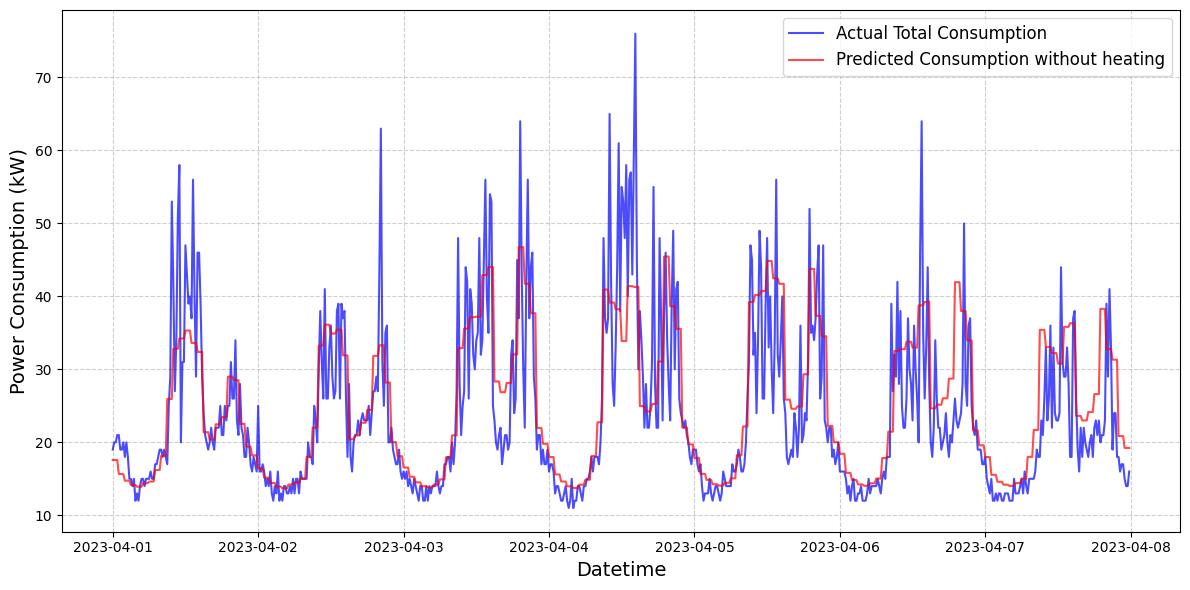

In [30]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 2: Filter data for the date range
start_date = "2023-4-1"
end_date = "2023-4-7"

# Convert to datetime format for comparison
date_range = pd.date_range(start=start_date, end=end_date)

# Filter data for the entire date range
one_day_data = data[data['Datetime'].dt.date.isin(date_range.date)]

X_Day = one_day_data[['Hour', 'day']]  # Example features (hour, month)
y_Day = one_day_data['Potência Ativa Saldo (kW) - Consumo']  # Target: Consumption

predictions = model.predict(X_Day)
# Ensure there is a 'Predicted Heating Consumption' column
# If not, you need to calculate it. This can be done by using a model or by loading predictions.
# For now, let's assume you have a 'Predicted Heating Consumption' column in your data.

# Step 3: Plot the actual and predicted consumption for the specific day
plt.figure(figsize=(12, 6))

# Plot actual total consumption for the specific day
plt.plot(
    one_day_data['Datetime'],
    one_day_data['Potência Ativa Saldo (kW) - Consumo'],
    label="Actual Total Consumption",
    color="blue",
    alpha=0.7,
)
print((one_day_data['Potência Ativa Saldo (kW) - Consumo']*0.25).sum())
# Plot predicted heating consumption for the specific day
# Make sure 'Predicted Heating Consumption' exists, otherwise this will raise an error
plt.plot(
    one_day_data['Datetime'],
    predictions,  # Replace with actual prediction column if necessary
    label="Predicted Consumption without heating",
    color="red",
    alpha=0.7,
)




# Customize the graph
plt.xlabel("Datetime", fontsize=14)
plt.ylabel("Power Consumption (kW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

Heat =  ((one_day_data['Potência Ativa Saldo (kW) - Consumo']*0.25) - predictions*0.25).clip(lower=0)


We were able to explain the peeks in the consumption by the synchronization of cycles in the washing machines and dryers and because we did not want to take those peeks into consideration because of their randomness we decided to make the model by the hour instead of every 15 min as the data is. This works like a low-pass filter.

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np


k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store R² scores for each fold
r2_scores = []

# Convert X_Day and y_Day to NumPy arrays for compatibility with sklearn
X = X_Day.values
y = y_Day.values

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    # Split into training and validation sets
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Predict on validation data
    y_pred = model.predict(X_val)
    
    # Calculate R² Score
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)
    
    print(f"Fold {fold + 1}: R² = {r2:.4f}")

# Calculate average R² score across all folds
average_r2 = np.mean(r2_scores)
print(f"\nAverage R² across {k} folds: {average_r2:.4f}")



Fold 1: R² = 0.5544
Fold 2: R² = 0.5142
Fold 3: R² = 0.6706
Fold 4: R² = 0.4477
Fold 5: R² = 0.6602
Fold 6: R² = 0.5987
Fold 7: R² = 0.2677
Fold 8: R² = 0.4365
Fold 9: R² = 0.6194
Fold 10: R² = 0.6988

Average R² across 10 folds: 0.5468


Using k-fold cross-validation we see that we get a relatively good result and although it is not that different from the average R^{2}
 we were happy with the result. The idea is now to find the heating needs based on the difference between the month when the heating system is on vs when it is off.

9444.5


C:\Users\X521\anaconda3\envs\Advanced-automation\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


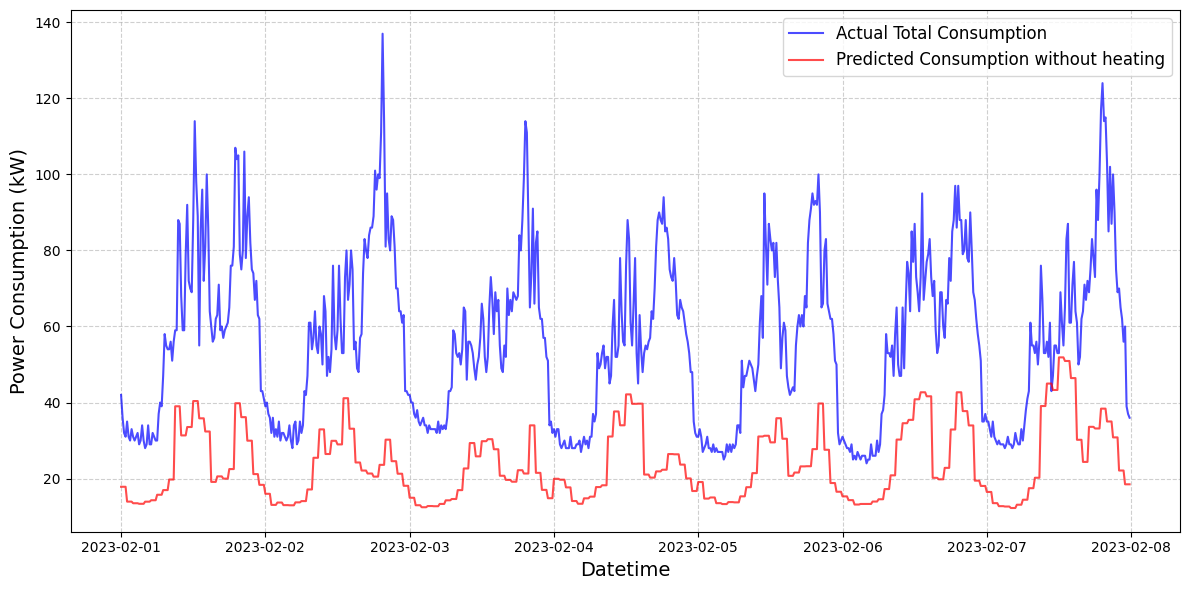

5452.7674701825945


In [32]:

# Step 2: Filter data for the date range
start_date = "2023-2-1"
end_date = "2023-2-7"

# Convert to datetime format for comparison
date_range = pd.date_range(start=start_date, end=end_date)

# Filter data for the entire date range
one_day_data = data[data['Datetime'].dt.date.isin(date_range.date)]

X_Day = one_day_data[['Hour', 'day']]  # Example features (hour, month)
y_Day = one_day_data['Potência Ativa Saldo (kW) - Consumo']  # Target: Consumption

predictions = model.predict(X_Day)
# Ensure there is a 'Predicted Heating Consumption' column
# If not, you need to calculate it. This can be done by using a model or by loading predictions.
# For now, let's assume you have a 'Predicted Heating Consumption' column in your data.

# Step 3: Plot the actual and predicted consumption for the specific day
plt.figure(figsize=(12, 6))

# Plot actual total consumption for the specific day
plt.plot(
    one_day_data['Datetime'],
    one_day_data['Potência Ativa Saldo (kW) - Consumo'],
    label="Actual Total Consumption",
    color="blue",
    alpha=0.7,
)
print((one_day_data['Potência Ativa Saldo (kW) - Consumo']*0.25).sum())
# Plot predicted heating consumption for the specific day
# Make sure 'Predicted Heating Consumption' exists, otherwise this will raise an error
plt.plot(
    one_day_data['Datetime'],
    predictions,  # Replace with actual prediction column if necessary
    label="Predicted Consumption without heating",
    color="red",
    alpha=0.7,
)




# Customize the graph
plt.xlabel("Datetime", fontsize=14)
plt.ylabel("Power Consumption (kW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

Heat =  ((one_day_data['Potência Ativa Saldo (kW) - Consumo']*0.25) - predictions*0.25).clip(lower=0)
print(Heat.sum())

We can see that in February the model does not predict well the consumption. We can also see that the consumption is more volatile and thus it is beter to apply the model only to the summer months and base all consumption except heating in the "summer" month.

Now we need to consider the consumption breakdown. This part of the project is interesting because it uses the random forest model obtained for the winter together with one applied to the summer.

Change the date to obtain the plot for each month:

In [33]:
start_date = "2024-2-5"
end_date = "2024-2-11"

C:\Users\X521\AppData\Local\Temp\ipykernel_6356\567030192.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['Datetime'] = pd.to_datetime(summer_data['Data'].astype(str) + ' ' + summer_data['Hora'])
C:\Users\X521\AppData\Local\Temp\ipykernel_6356\567030192.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_day_data['predictions_noheat'] = model_noheat.predict(X_Day)
C:\Users\X521\AppData\Local\Temp\ipykernel_6356\567030192.py:58: SettingWithCopyWarning: 
A value is trying to be set on a 

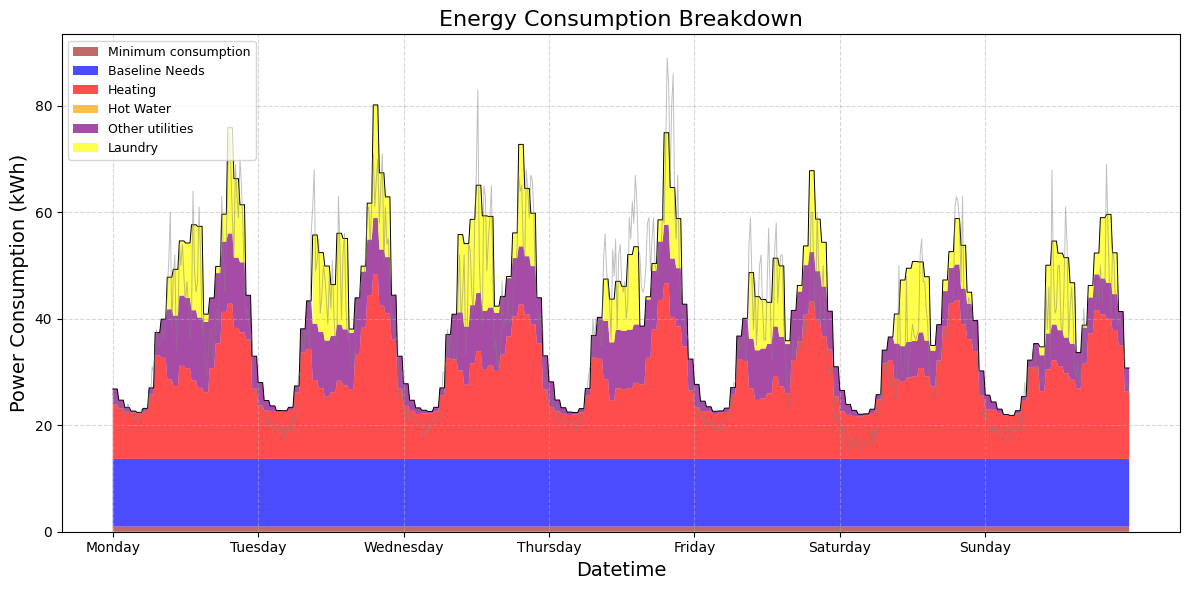

In [34]:
import pandas as pd
# Load the data
data = pd.read_excel(file)
data['Potência Ativa Saldo (kW) - Consumo'] = data['Potência Ativa Saldo (kW) - Consumo']*0.25

data['Season'] = data['Data'].apply(get_season)

seasonal_means = data.groupby('Season')['Potência Ativa Saldo (kW) - Consumo'].mean()

# 1. Convert 'Data' to string and combine with 'Hora' to create a proper datetime column
data['Datetime'] = pd.to_datetime(data['Data'].astype(str) + ' ' + data['Hora'])

# 2. Extract 'Hour' and 'Month' from the 'Datetime' column
data['Hour'] = data['Datetime'].dt.hour    # Extract hour from Datetime
data['day'] = data['Datetime'].dt.day_of_week # Extract month from Datetime

# 3. Filter for summer data (if you have a 'Season' column indicating summer)
summer_data = data[data['Season'] == 'summer']
winter_data = data[data['Season'] == 'Winter']

# 4. Define Features (X) and Target (y)
X_summer = summer_data[['Hour', 'day']]  # Example features (hour, month)
y_summer = summer_data['Potência Ativa Saldo (kW) - Consumo']  # Target: Consumption
X_winter = winter_data[['Hour', 'day']]  # Example features (hour, month)
y_winter = winter_data['Potência Ativa Saldo (kW) - Consumo']  # Target: Consumption

# 6. Train the model (RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor
model_noheat = RandomForestRegressor(random_state=42)
model_noheat.fit(X_summer, y_summer)
model_heat = RandomForestRegressor(random_state=42)
model_heat.fit(X_winter, y_winter)
# 2. Ensure 'Datetime' is in datetime format and extract time from 'Hora'
summer_data['Datetime'] = pd.to_datetime(summer_data['Data'].astype(str) + ' ' + summer_data['Hora'])

from sklearn.metrics import mean_squared_error
# Step 2: Filter data for the date range

# Convert to datetime format for comparison
date_range = pd.date_range(start=start_date, end=end_date)

# Filter data for the entire date range
one_day_data = data[data['Datetime'].dt.date.isin(date_range.date)]
# Create a column indicating if the hour is within the laundry schedule

X_Day = one_day_data[['Hour', 'day']]  # Example features (hour, month)
y_Day = one_day_data['Potência Ativa Saldo (kW) - Consumo']  # Target: Consumption



# Filter rows where 'Hora' is between midnight and 7:00 AM
Min_con = data[data['Potência Ativa Saldo (kW) - Consumo'] > 0]['Potência Ativa Saldo (kW) - Consumo'].min()
# Calculate the mean of the selected rows for a specific column (e.g., 'Potência Ativa Saldo (kW) - Consumo')
Unidentified_consumptions = one_day_data[one_day_data['Hour'].isin([0, 1, 2, 3, 4, 5, 6, 11])].max()


one_day_data['predictions_noheat'] = model_noheat.predict(X_Day)
one_day_data['predictions_heat'] = model_heat.predict(X_Day)
baseline_mean = one_day_data['predictions_noheat'].min()-Min_con

one_day_data['Heating'] = one_day_data['predictions_heat'] - one_day_data['predictions_noheat']
one_day_data['heat'] = one_day_data['Heating']

#one_day_data['Washing/Drying'] = 0
#one_day_data['Washing/Drying'] = predictions_noheat[~predictions_noheat['Hour'].isin([0, 1, 2, 3, 4, 5, 6, 11])] - baseline_mean

# Filter the DataFrame based on the time range
LAundry_time = one_day_data[
    ((one_day_data['Hora'] >= '09:00')
    & (one_day_data['Hora'] <= '22:30'))
]


# Calculate the second minimum for each day
one_day_data['average_mid_day'] = LAundry_time.groupby('Data')['predictions_heat'].transform(
    lambda x: x.nsmallest(3).iloc[-1] if len(x) > 1 else x.min()
)
# Calculate the second minimum for each day
one_day_data['average_mid_day'] = LAundry_time.groupby('Data')['predictions_noheat'].transform(
    lambda x: x.nsmallest(3).iloc[-1] if len(x) > 1 else x.min()
)
one_day_data['Hot_water'] = 0

Laundry_total = one_day_data['predictions_noheat'].sum()*0.23

difference = one_day_data['predictions_noheat'] - one_day_data['average_mid_day']
difference_low = abs(difference.clip(lower=0))
difference_up = abs(one_day_data['predictions_noheat'] + difference.clip(upper=0))
one_day_data['Washing/Drying'] = difference_low


"""
LAundry = LAundry_time['Potência Ativa Saldo (kW) - Consumo'].sum()

Laudry_coef = Laundry_total/LAundry
one_day_data['Washing/Drying'] = LAundry_time['Potência Ativa Saldo (kW) - Consumo']*Laudry_coef
"""



# Extract the day of the week as a new column
one_day_data['DayOfWeek'] = one_day_data['Datetime'].dt.day_name()

if one_day_data['Data'].apply(get_season).eq('Winter').all():

  # Calculate contributions for one_day_data
  one_day_data['Lighting/Other'] = baseline_mean
  one_day_data['Min_con'] = Min_con
  one_day_data['cozinha'] = one_day_data['predictions_heat'] - one_day_data['Washing/Drying'].fillna(0) -   one_day_data['Min_con'] -one_day_data['Lighting/Other'] - one_day_data['Heating']

else:
  # Calculate contributions for one_day_data
  one_day_data['Heating'] = 0
  one_day_data['Lighting/Other'] = baseline_mean
  one_day_data['Min_con'] = Min_con
  one_day_data['cozinha'] = one_day_data['predictions_noheat'] - one_day_data['Washing/Drying'].fillna(0) -   one_day_data['Min_con'] -one_day_data['Lighting/Other'] - one_day_data['Heating']



plt.figure(figsize=(12, 6))
plt.stackplot(
    one_day_data['Datetime'],
    one_day_data['Min_con'],
    one_day_data['Lighting/Other'],
    one_day_data['Heating'],
    one_day_data['Hot_water'],
    one_day_data['cozinha'],
    one_day_data['Washing/Drying'],

    labels=['Minimum consumption', 'Baseline Needs','Heating', 'Hot Water', 'Other utilities', 'Laundry'],
    colors=['brown','blue' , 'red', 'Orange','purple', 'yellow'],
    alpha=0.7
)

if one_day_data['Data'].apply(get_season).eq('Winter').all():
  plt.plot(
      one_day_data['Datetime'],
      #one_day_data['Potência Ativa Saldo (kW) - Consumo'],
      one_day_data['predictions_heat'],
      color="black",
      alpha=1,
      linewidth=0.7
  )
else:
  plt.plot(
      one_day_data['Datetime'],
      #one_day_data['Potência Ativa Saldo (kW) - Consumo'],
      one_day_data['predictions_noheat'],
      color="black",
      alpha=1,
      linewidth=0.7
  )


plt.plot(
      one_day_data['Datetime'],
      one_day_data['Potência Ativa Saldo (kW) - Consumo'],
      color="gray",
      alpha=0.5,
      linewidth=0.7
  )

# Customize the x-axis to show only the day of the week
x_ticks = one_day_data['Datetime'][::len(one_day_data) // 7]# Select 7 equally spaced ticks
x_labels = one_day_data['DayOfWeek'][::len(one_day_data) // 7]  # Corresponding day of the week labels
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels)




# Customize the plot
plt.title("Energy Consumption Breakdown", fontsize=16)
plt.xlabel("Datetime", fontsize=14)
plt.ylabel("Power Consumption (kWh)", fontsize=14)
plt.legend(loc="upper left", fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


image_path = "Phase_0.png"  # You can specify any path or filename

# Get current y-ticks and rescale them
ax = plt.gca()  # Get current axis
yticks = ax.get_yticks()
ax.set_yticklabels([f"{tick * 4:.0f}" for tick in yticks])  # Multiply by 4 and update labels

plt.savefig(image_path, format="png", dpi=300)

# Show the plot
plt.show()




In the end, we predicted the structure of the consumption based on the services schedule and machine power. We used the model trained with the "summer" data to predict everything except the heating and then with the difference between them we got the heating spending. 
In the project, this data was used to design a heat pump central heating system that is more efficient and to optimise service schedule in order to save money on electricity. 